# MFCC

In [12]:
import numpy
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [52]:
sample_rate, signal = scipy.io.wavfile.read("F:/178/Tugas Akhir/dataset/clips_45sec_wav/2.wav")  # File assumed to be in the same directory
signal = signal[0:int(45 * sample_rate//2)]  # Keep the first 45 seconds

In [10]:
# signal

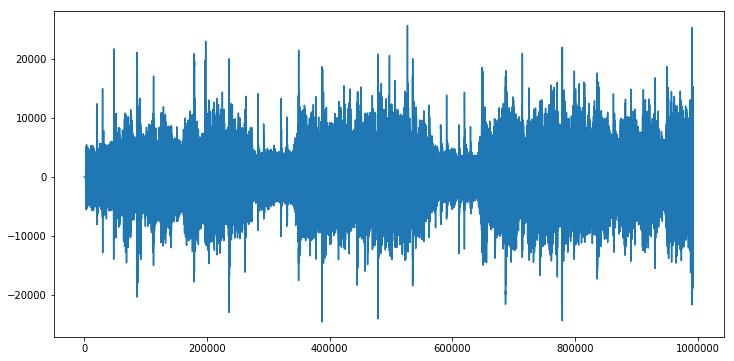

In [53]:
plt.figure(figsize=(12, 6))

# plt.ylabel('Hz')
# plt.xlabel('TIme')
plt.plot(signal)

In [54]:
pre_emphasis = 0.97
emphasized_signal = numpy.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

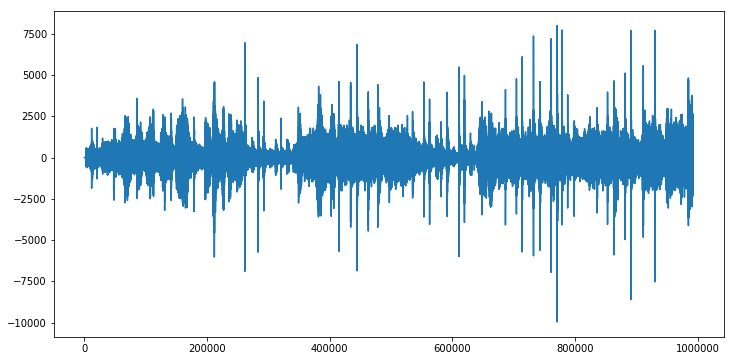

In [55]:
plt.figure(figsize=(12, 6))

# plt.ylabel('Hz')
# plt.xlabel('TIme')
plt.plot(emphasized_signal)

In [78]:
frame_size = 0.025
frame_stride = 0.01
NFFT = 512
nfilt = 40
num_ceps = 13

In [79]:
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
signal_length = len(emphasized_signal)
frame_length = int(round(frame_length))
frame_step = int(round(frame_step))
num_frames = int(numpy.ceil(float(numpy.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

pad_signal_length = num_frames * frame_step + frame_length
z = numpy.zeros((pad_signal_length - signal_length))
pad_signal = numpy.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

indices = numpy.tile(numpy.arange(0, frame_length), (num_frames, 1)) + numpy.tile(numpy.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
frames = pad_signal[indices.astype(numpy.int32, copy=False)]

In [80]:
frames *= numpy.hamming(frame_length)
# frames *= 0.54 - 0.46 * numpy.cos((2 * numpy.pi * n) / (frame_length - 1))  # Explicit Implementation **

In [81]:
mag_frames = numpy.absolute(numpy.fft.rfft(frames, NFFT))  # Magnitude of the FFT
pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

In [82]:
low_freq_mel = 0
high_freq_mel = (2595 * numpy.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
mel_points = numpy.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
bin = numpy.floor((NFFT + 1) * hz_points / sample_rate)

fbank = numpy.zeros((nfilt, int(numpy.floor(NFFT / 2 + 1))))
for m in range(1, nfilt + 1):
    f_m_minus = int(bin[m - 1])   # left
    f_m = int(bin[m])             # center
    f_m_plus = int(bin[m + 1])    # right

    for k in range(f_m_minus, f_m):
        fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
    for k in range(f_m, f_m_plus):
        fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
filter_banks = numpy.dot(pow_frames, fbank.T)
filter_banks = numpy.where(filter_banks == 0, numpy.finfo(float).eps, filter_banks)  # Numerical Stability
filter_banks = 20 * numpy.log10(filter_banks)  # dB

In [83]:
mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

In [84]:
numpy.shape(mfcc)

(2248, 13)

In [74]:
lin = mfcc.flatten()

TypeError: object of type 'float' has no len()

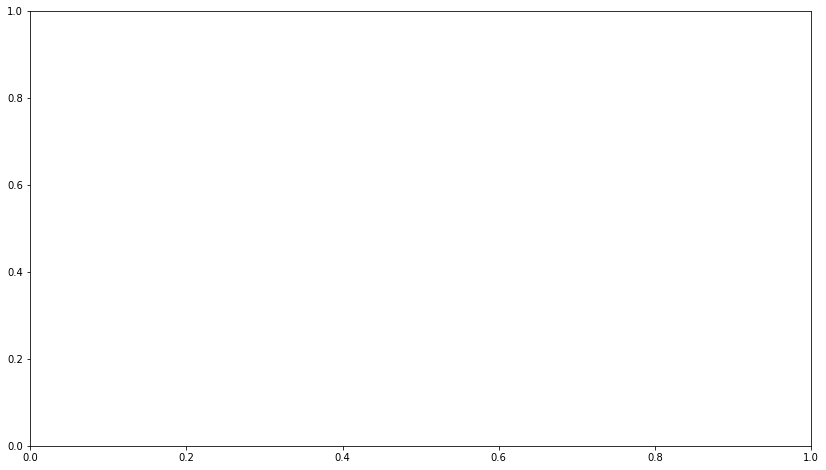

In [85]:
plt.figure(figsize=(14, 8))
plt.specgram(pre_emphasis)

# plt.ylabel('Hz')
# plt.xlabel('TIme')
# plt.specgram(x=emphasized_signal, 
#              NFFT=NFFT, 
#              Fs=sample_rate//2, 
#              Fc=0,
#              window= numpy.hamming(frame_length),
#              noverlap=0,
#              cmap=None, 
#              xextent=None, 
#              pad_to=None, 
#              sides='default',
#              scale_by_freq=None, 
#              mode='default', 
#              scale='default')

In [77]:
numpy.shape(lin)

(29224,)

In [64]:
sample_rate//2

22050